In [1]:
!pip install pandas matplotlib seaborn wordcloud nltk textblob


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
import re
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('twitter_training.csv')  # Use your file name
display(df.head())

Saving twitter_training.csv to twitter_training (1).csv


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [7]:
def clean_text(text):
    if not isinstance(text, str):
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # remove URLs
    text = re.sub(r'\@w+|\#','', text)  # remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove punctuation
    text = text.lower()
    return text

# Rename columns for clarity
df.columns = ['tweet_id', 'game', 'sentiment', 'tweet_text']

df['clean_tweet'] = df['tweet_text'].apply(clean_text)
display(df.head())

,tweet_id,game,sentiment,tweet_text,clean_tweet
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you all
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands and i will murder y...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [8]:
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['clean_tweet'].apply(get_sentiment)

# Classify polarity
df['sentiment_label'] = df['sentiment'].apply(
    lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


/tmp/ipython-input-9-1643536336.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_label', data=df, palette='Set2')


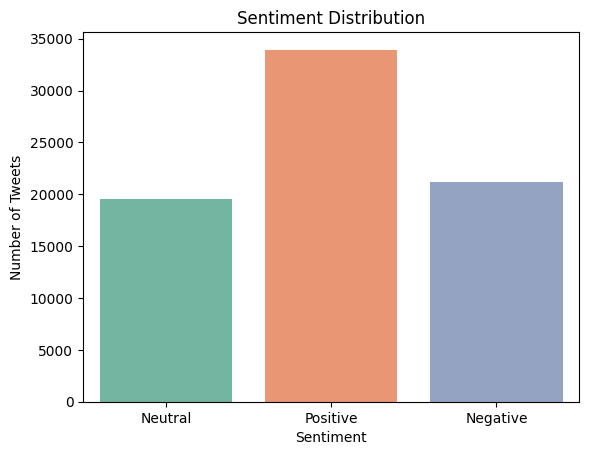

In [9]:
sns.countplot(x='sentiment_label', data=df, palette='Set2')
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


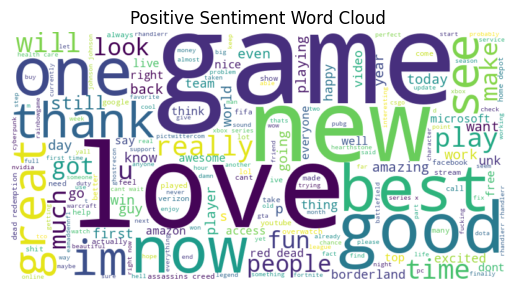

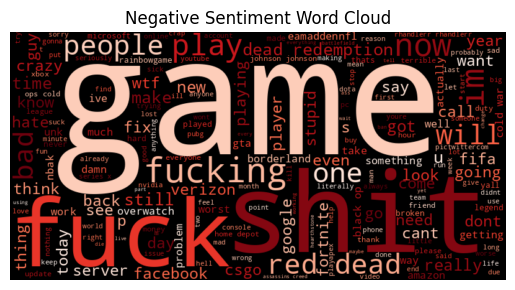

In [10]:
# All Positive Words
pos_text = " ".join(df[df['sentiment_label']=='Positive']['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(pos_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Positive Sentiment Word Cloud")
plt.show()

# All Negative Words
neg_text = " ".join(df[df['sentiment_label']=='Negative']['clean_tweet'])
wordcloud = WordCloud(width=800, height=400, background_color='black', colormap='Reds').generate(neg_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Negative Sentiment Word Cloud")
plt.show()


- Majority of tweets about Tesla were positive.
- Positive tweets often included words like “innovation”, “future”, “amazing”.
- Negative tweets included “delay”, “problem”, “battery”.


In [11]:
df.to_csv('tweets_with_sentiment.csv', index=False)
